In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banking-dataset-marketing-targets/train.csv
/kaggle/input/banking-dataset-marketing-targets/test.csv


In [3]:
train_df= pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/train.csv", sep=';')
test_df= pd.read_csv("/kaggle/input/banking-dataset-marketing-targets/test.csv", sep=';')

In [4]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#check the data-types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# fixing rows and columns - renaming, dropping, merging, filtering

train_df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [7]:
# missing values count

train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see, There are no null or missing values in the Dataset.

### Analysis

In [8]:
import matplotlib.pyplot as plt

train_df.balance.quantile([0.25,0.50, 0.75, 0.95, 0.98, 0.99])

0.25       72.0
0.50      448.0
0.75     1428.0
0.95     5768.0
0.98     9439.4
0.99    13164.9
Name: balance, dtype: float64

balance looks good

## Univariate analysis

In [9]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


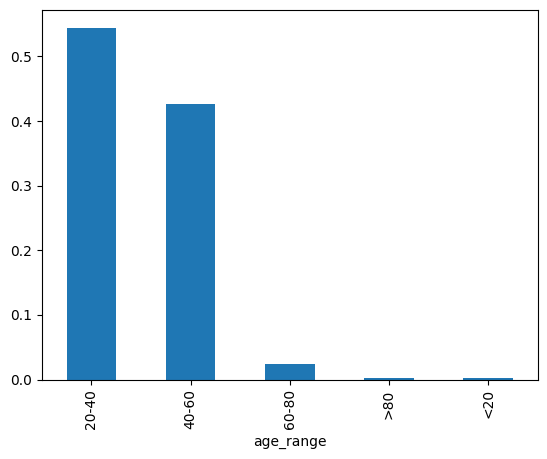

In [10]:
train_df['age_range'] = pd.cut(train_df['age'], bins=[0,20,40,60,80,120], labels=['<20','20-40','40-60','60-80','>80'])
train_df['age_range'].value_counts(normalize=True).plot.bar()
plt.show()

people of mostly age 20 -60 are contacted for the current or previous campaign 

In [11]:
# highest education of peoples contacted in percentage

(train_df.education.value_counts(normalize=True) * 100)

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

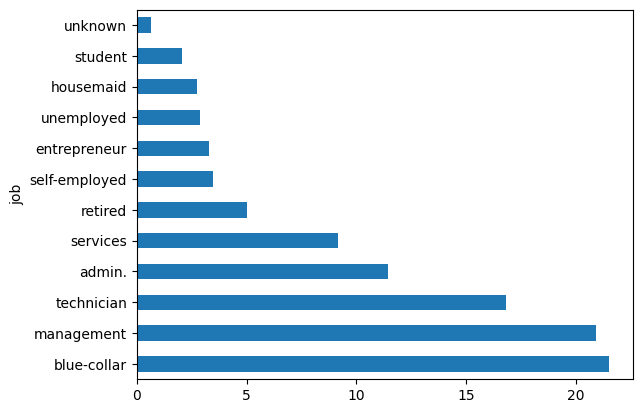

In [12]:
# Job of peoples contacted in percentage
(train_df.job.value_counts(normalize=True)*100).plot.barh()
plt.show()

mostly people of job titles/ Industry 'blue-collar', 'management', 'technician' are contacted for the current or previous campaign,  students are contacted the least

# Bi-Variate Analysis

In [13]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,40-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-60
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,20-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-60
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,20-40


/tmp/ipykernel_33/2222768077.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['age_range'])['balance'].median().plot.barh()


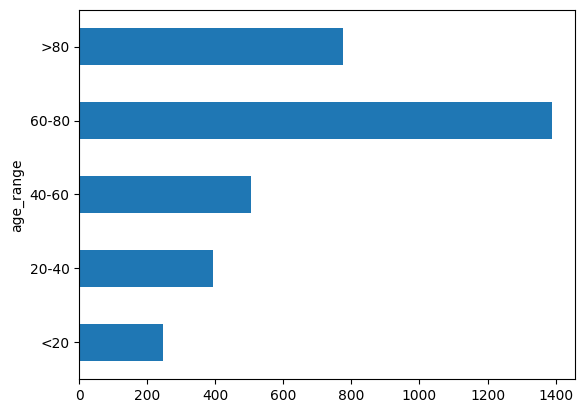

In [14]:
# numerical vs numerical
import seaborn as sns

train_df.groupby(['age_range'])['balance'].median().plot.barh()
plt.show()

Indivisuals of Age range 60-80 are having the maximum balance

/tmp/ipykernel_33/1215697536.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['age_range'])['duration'].median().plot.barh()


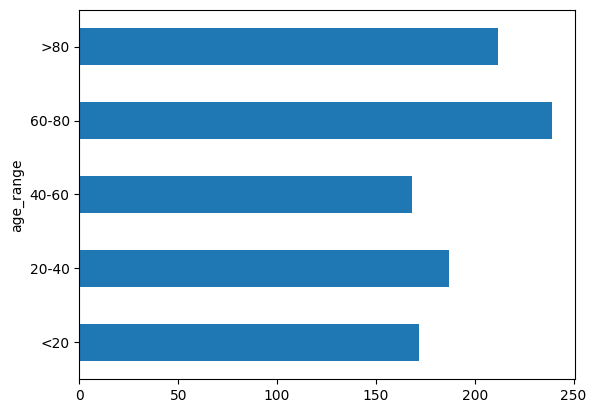

In [15]:
train_df.groupby(['age_range'])['duration'].median().plot.barh()
plt.show()

In [16]:
train_df.y.unique()

array(['no', 'yes'], dtype=object)

### Categorical vs Numerical Analysis

In [17]:
# change column 'Y' to numerical for analysis

train_df['y'] = np.where(train_df['y'] == 'yes',1,0)
train_df['y'].unique()

array([0, 1])

In [18]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,40-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,40-60
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,20-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,40-60
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,20-40


/tmp/ipykernel_33/989067440.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['age_range'])['y'].mean().plot.bar()


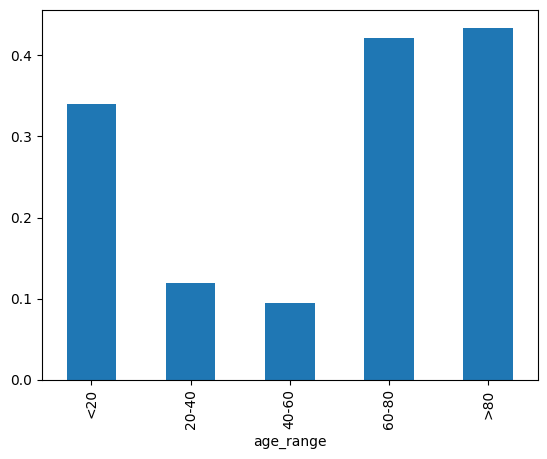

In [19]:
# age range vs response

train_df.groupby(['age_range'])['y'].mean().plot.bar()
plt.show()

most positive responses are from age group '>80' and '60-80'

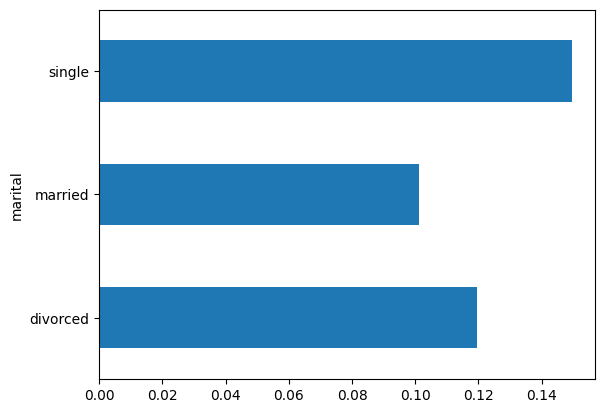

In [20]:
# age range vs response

train_df.groupby(['marital'])['y'].mean().plot.barh()
plt.show()

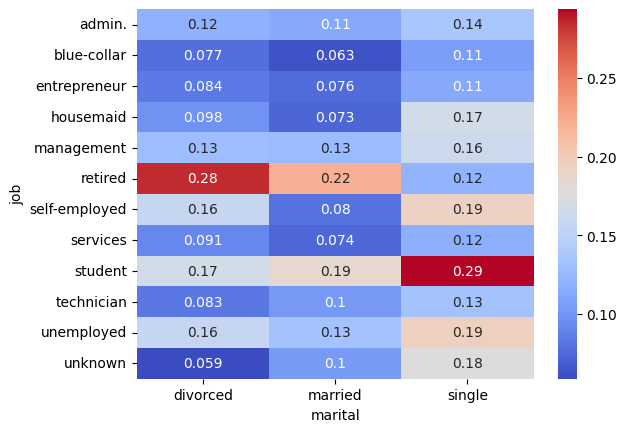

In [21]:
# multivariate Analysis

res = pd.pivot_table(data=train_df,values='y',index='job', columns='marital',aggfunc="mean")
sns.heatmap(res, annot=True, cmap='coolwarm')
plt.show()

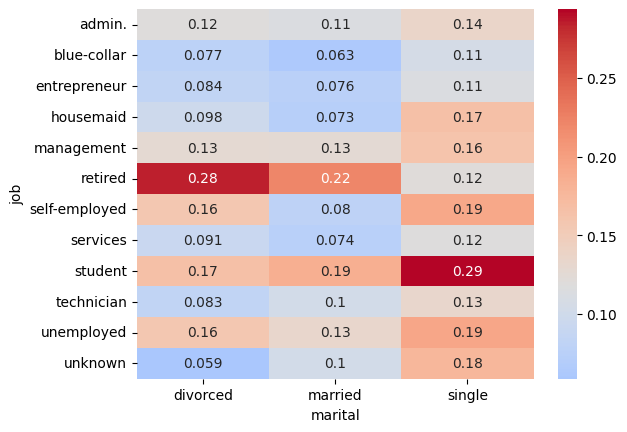

In [22]:
#response rate

mean_response = train_df['y'].mean()

# we will add this as a centre for the heatmaps
sns.heatmap(res, annot=True, cmap='coolwarm',center=mean_response)
plt.show()

according to the graph, 'retired and devorced' and 'single students' are having the highest positive response towards term deposit

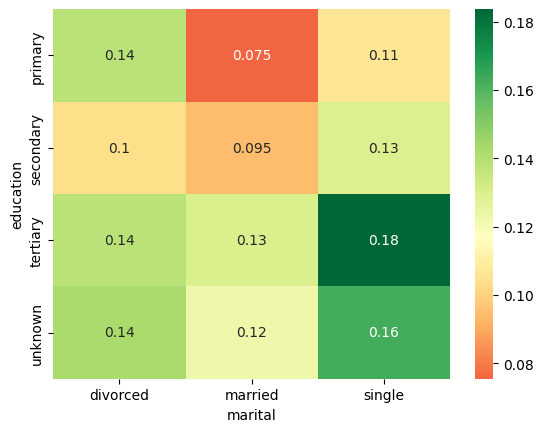

In [23]:
education_res = pd.pivot_table(data=train_df,values='y',index='education', columns='marital',aggfunc="mean")
sns.heatmap(education_res, annot=True, cmap='RdYlGn',center=mean_response)
plt.show()

singles with tertiary education level are having positive responses towards term deposit. Whereas, married individuals with primary level of education are having the lowest positive responses.

In [26]:
# analyse on pdays

train_df.groupby(['poutcome'])['y'].mean()

poutcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091615
Name: y, dtype: float64

Indivisuals who had responded positivly in the previous campaign has the highest positive response ratee in the current campaign too